In [1]:
import h5py
import numpy as np
import pandas as pd 
import os
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import re

In [2]:
def convert_csv_to_txt(input_file,output_file):
   
    with open(input_file, 'r') as csv_file, open(output_file, 'w') as space_delimited_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            space_delimited_file.write(' '.join(row) + '\n')

    print(f'CSV file "{input_file}" converted to space-delimited file "{output_file}"')


In [3]:
def read_file(file):
    hf = h5py.File(file, 'r')
    attributes = []
    for key in hf.keys():
        attributes.append(key)
    
    return attributes, hf

In [4]:
def get_data(hf,attributes):
    data = []
    pm = []
    acc_pm = []
    loss_pm = []
    loss_gm = []
    for i in range(len(attributes)):
        ai = hf.get(attributes[i])
        ai = np.array(ai)
        data.append(ai)
    
    return data


In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_convergence(df_loss, fig_path):
    head_value = 50
    mag_head = 10
    df_loss = df_loss.head(head_value)
    fig, ax = plt.subplots(figsize=(8, 6))  # Use a single Axes instance
    manual_location = (0.0, 0.0, 1.0, 1.0)
    # Define a list of colors for the plots
    colors = ['green', 'magenta', 'black', 'red']
    
    for col, color in zip(sorted(df_loss.columns), colors):  # Sorting columns and using colors
        ax.plot(df_loss.index, df_loss[col], label=col, color=color)  # Set color manually

    ax.set_xticks(range(0, head_value+1, int(head_value/10)))  # Setting x-axis ticks
    ax.tick_params(axis='x', labelsize=20)  
    ax.tick_params(axis='y', labelsize=20)
    ax.grid(True)
    ax.set_yscale('log')  # Set y-axis scale to logarithmic for loss
    
    # Add inset for the magnified portion
    """axins = inset_axes(ax, width="40%", height="40%",bbox_to_anchor=manual_location, loc='upper right', bbox_transform=ax.transAxes)
    df_magnified = df_loss.head(mag_head)
    for col, color in zip(sorted(df_magnified.columns), colors):
        axins.plot(df_magnified.index, df_magnified[col], color=color)
        axins.set_yscale('log')
    # Customize the inset plot
    axins.set_xticks(range(0, mag_head+1, int(mag_head/5)))
    axins.set_yticks([])
    axins.tick_params(axis='x', labelsize=16)  
    axins.tick_params(axis='y', labelsize=16)
"""
    ax.set_ylabel('Loss', fontsize=24)
    ax.set_xlabel('Global Iteration', fontsize=24)
    # legend = ax.legend(loc='upper left', bbox_to_anchor=(0.09, 1.0), ncol=1, fontsize=24)
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=len(df_loss.columns), fontsize=20, frameon=False)

    for legobj in legend.legendHandles:
        legobj.set_linewidth(4)
    plt.tight_layout()
    plt.savefig(fig_path + 'per_loss_client_vs_data_silo.png', bbox_inches='tight', dpi=300)
    plt.show()


In [77]:
# Function to extract the numerical value from the column names
def extract_value(col_name):
    match = re.search(r"p = ([\d\.]+)", col_name)
    if match:
        return float(match.group(1))
    else:
        return 0

In [78]:
def convergence_analysis(path):
    df_loss = pd.DataFrame()
    df_accuracy = pd.DataFrame()
    df_gap = pd.DataFrame()

    dir_list = os.listdir(path)
    #print(dir_list)
    for file_name in dir_list:
    
        if file_name.endswith(".h5"):
            # Regular expression pattern to match 'client_frac_' followed by any number
            print(file_name)
            
             
            if re.search('_exp_no_0_GR_50_BS_32_data_silo_20', file_name):
                column_name = 20
            elif re.search('_exp_no_0_GR_50_BS_32_data_silo_40', file_name):
                column_name = 40
            elif re.search('_exp_no_0_GR_50_BS_32_data_silo_60', file_name):
                column_name = 60
            elif re.search('_exp_no_0_GR_50_BS_32_data_silo_100', file_name):
                column_name = 100
            
            attributes, hf = read_file(path+file_name)

            data = get_data(hf,attributes)
            #id=0
            for key in hf.keys():
                attributes.append(key)
               # print("id [",id,"] :", key)
            #id+=1
                
            val_loss = np.array(hf.get('per_test_loss'))
            #print(f"val_loss : {val_loss}")
            val_acc = np.array(hf.get('per_test_accuracy'))
            #print(val_acc)
            #print(f"val_acc : {val_acc}")
            # gap = np.array(hf.get('fw_gap'))
                
            df_loss[column_name] = val_loss
            df_accuracy[column_name] = val_acc
            
            # Sort the DataFrame columns based on the extracted numerical value
            # sorted_columns_loss = sorted(df_loss.columns, key=extract_value)
            # sorted_columns_acc = sorted(df_accuracy.columns, key=extract_value)
            # Reorder the DataFrame according to the sorted columns
            #df_loss_1 = df_loss[sorted_columns_loss]
            # df_acc_1 = df_accuracy[sorted_columns_acc]
    # print(df_loss)
            # print(df_accuracy)       
    plot_convergence(df_loss, path)

/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/8.0/h5/
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_8.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_8.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_8.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_8.0.h5


/tmp/ipykernel_3885797/1247387795.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


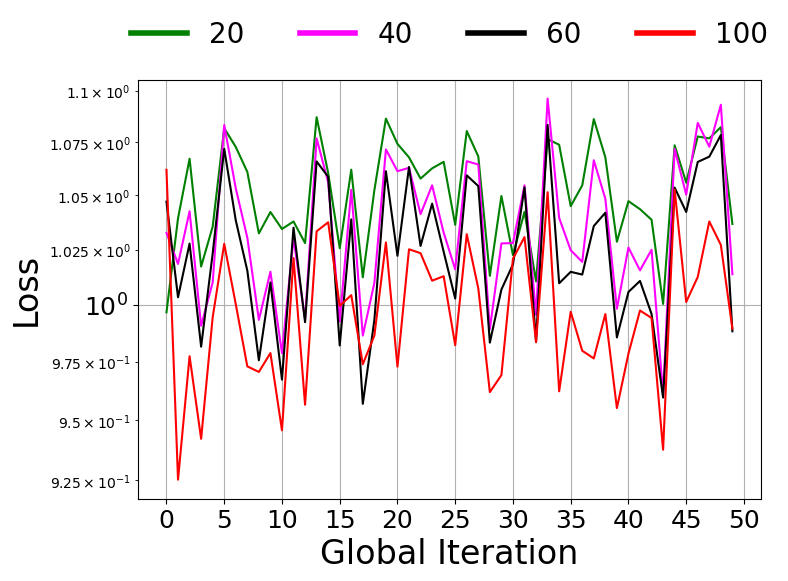

/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/16.0/h5/
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_16.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_16.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_16.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_16.0.h5


/tmp/ipykernel_3885797/1247387795.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


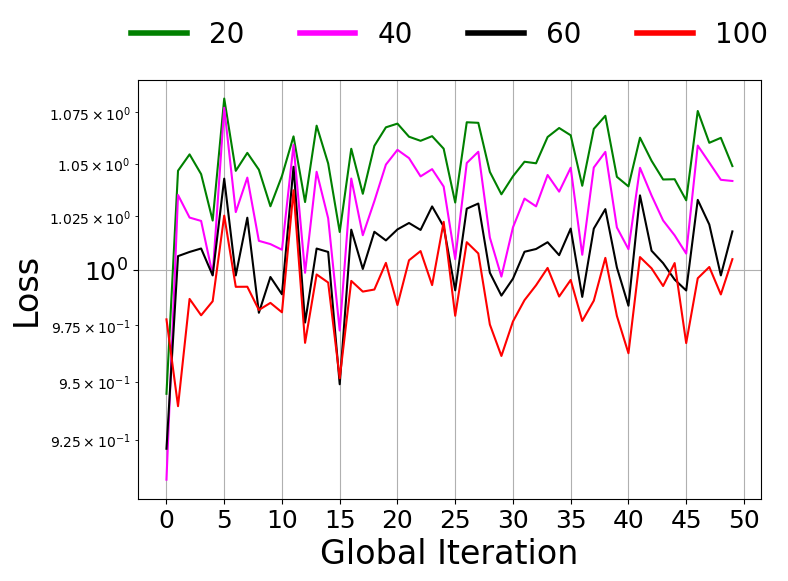

/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/24.0/h5/
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_24.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_24.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_24.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_24.0.h5


/tmp/ipykernel_3885797/1247387795.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


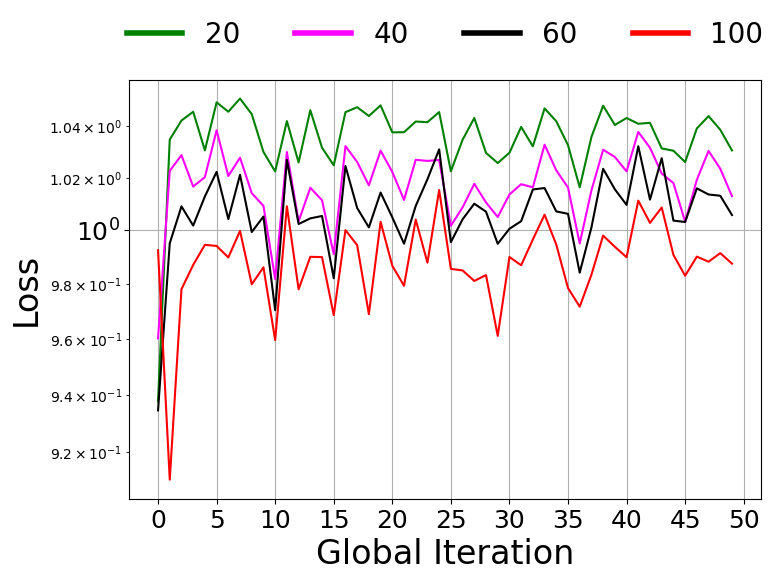

/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/32.0/h5/
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_32.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_32.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_32.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_32.0.h5


/tmp/ipykernel_3885797/1247387795.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


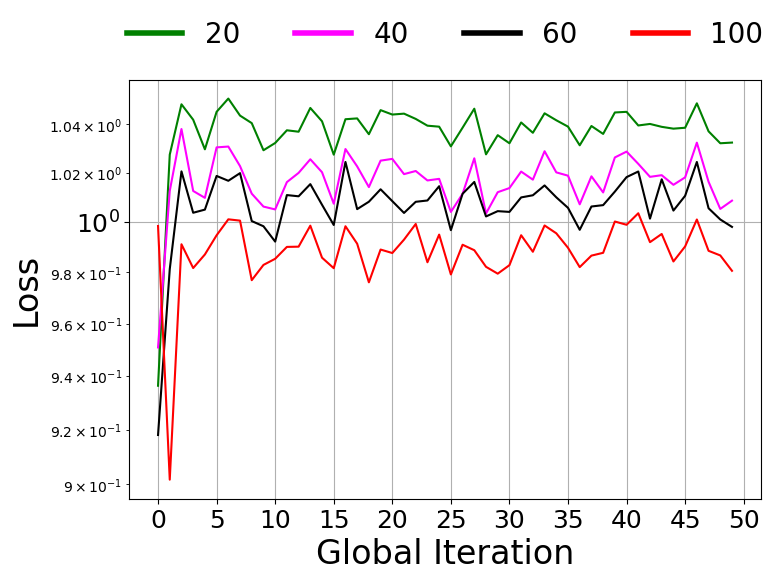

/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/40.0/h5/
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_40.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_40.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_40.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_40.0.h5


/tmp/ipykernel_3885797/1247387795.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


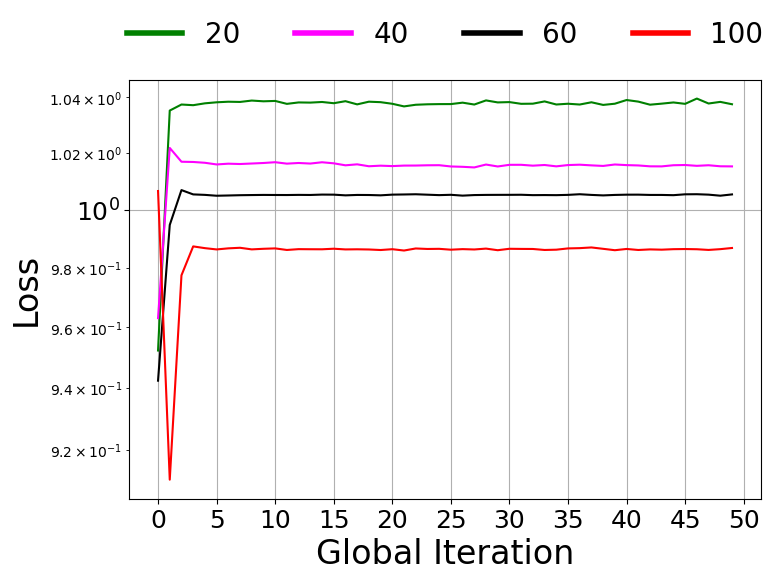

/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/8.0/h5/
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_8.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_8.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_8.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_8.0.h5


/tmp/ipykernel_3885797/1247387795.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


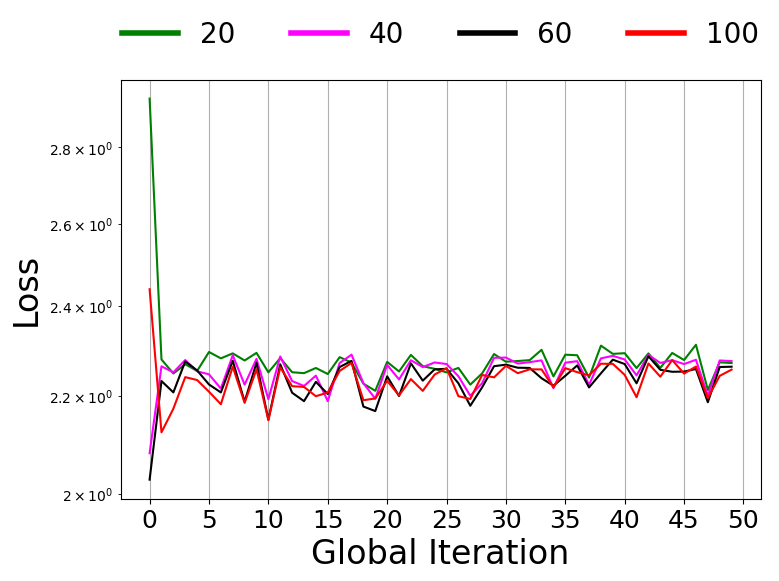

/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/16.0/h5/
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_16.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_16.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_16.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_16.0.h5


/tmp/ipykernel_3885797/1247387795.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


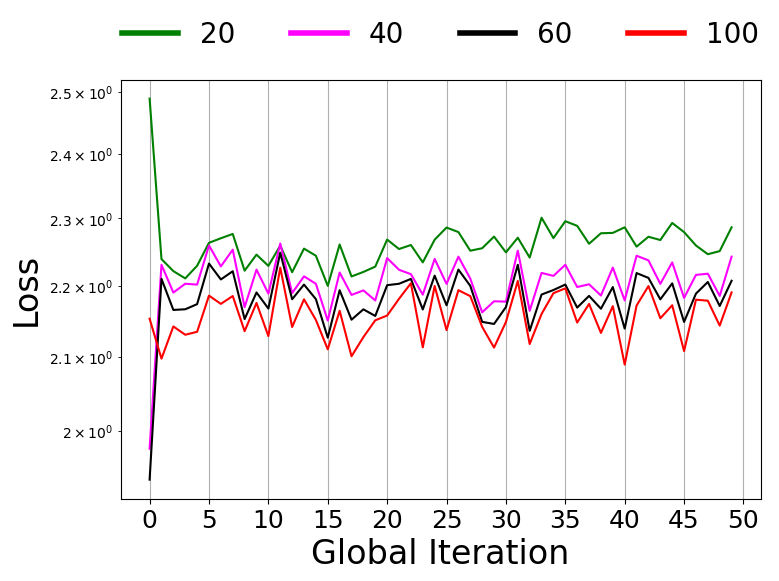

/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/24.0/h5/
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_24.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_24.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_24.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_24.0.h5


/tmp/ipykernel_3885797/1247387795.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


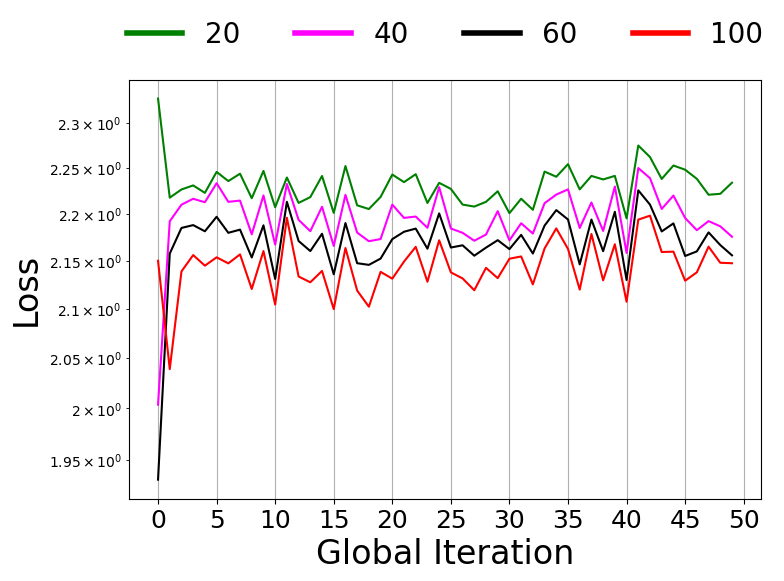

/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/32.0/h5/
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_32.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_32.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_32.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_32.0.h5


/tmp/ipykernel_3885797/1247387795.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


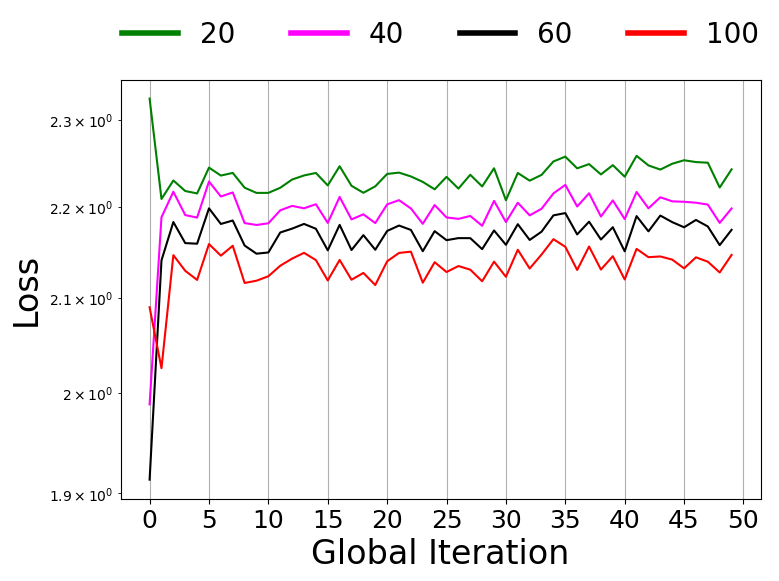

/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/40.0/h5/
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_40.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_40.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_40.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_40.0.h5


/tmp/ipykernel_3885797/1247387795.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


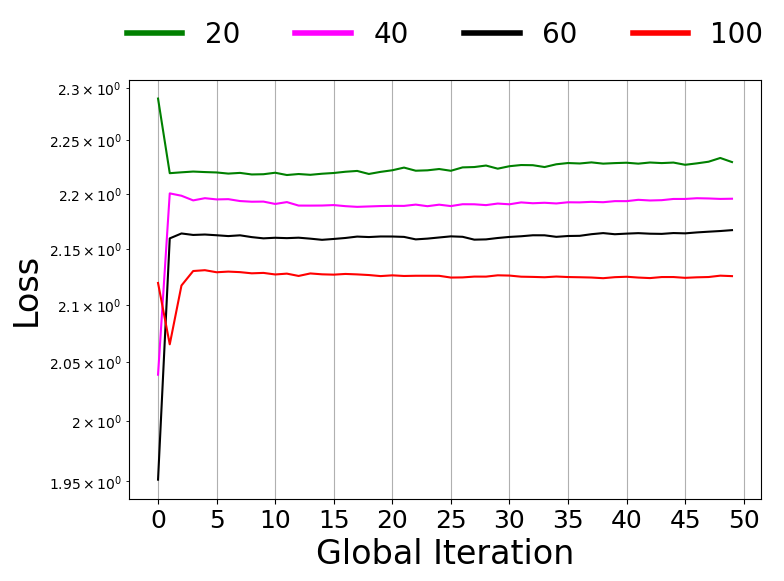

In [79]:
paths = [["/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/8.0/h5/",
          "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/16.0/h5/",
          "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/24.0/h5/",
          "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/32.0/h5/",
          "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/40.0/h5/"],
          ["/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/8.0/h5/",
           "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/16.0/h5/",
           "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/24.0/h5/",
           "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/32.0/h5/",
           "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/40.0/h5/"]
          ]
for path in paths:
    for p in path:
        print(p)
        convergence_analysis(p)

Accuracy vs number of clients vs Data_silo

In [52]:
def plot_3D(clients, data_silos, validation_accuracy, fig_path):
    line_styles = ['-', '--', '-.', ':']
    marker_types = ['o', '^', 's', 'p', '*']

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Ensure we have enough styles by repeating the list if necessary
    if len(clients) > len(line_styles):
        expanded_line_styles = line_styles * (len(clients) // len(line_styles) + 1)
    else:
        expanded_line_styles = line_styles

    if len(clients) > len(marker_types):
        expanded_marker_types = marker_types * (len(clients) // len(marker_types) + 1)
    else:
        expanded_marker_types = marker_types

    colors = plt.cm.viridis(np.linspace(0, 1, len(clients)))  # Define colors for plotting

    for i, client in enumerate(clients):
        ax.plot(data_silos, validation_accuracy[i], zs=client, zdir='x', color=colors[i],
                linestyle=expanded_line_styles[i % len(expanded_line_styles)],
                marker=expanded_marker_types[i % len(expanded_marker_types)],
                linewidth=2, markersize=8, label=f'Clients: {client}')

    ax.set_xlabel('Number of Clients', fontsize=20, labelpad=10)  # Increase font size here
    ax.set_ylabel('Data Silos', fontsize=20, labelpad=10)  # Increase font size here
    ax.set_zlabel('Validation Accuracy', fontsize=20, labelpad=10)  # Increase font size here
    # ax.set_title('Validation Accuracy across Number of Clients and Data Silos', fontsize=18)  # Optional: Increase title font size
    
    ax.tick_params(axis='x', pad=3)  # Adjust pad value as needed for x-axis
    ax.tick_params(axis='y', pad=3)  # Adjust pad value as needed for y-axis
    ax.tick_params(axis='z', pad=3)  # Adjust pad value as needed for z-axis
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), fontsize=20, ncol=3)  # Increase legend font size
    
    for legobj in legend.legendHandles:
        legobj.set_linewidth(4.0)  # Increase legend line width for visibility
    
    plt.tight_layout()
     # Adjust layout
    plt.subplots_adjust(left=0.0, right=0.9, top=0.9, bottom=0.1)  # Manually adjust if necessary
    
    plt.savefig(fig_path + 'acc_vs_client_vs_data_silo.png', bbox_inches='tight', dpi=300)
    plt.show()

In [51]:
def accuracy_clients_data_silo_analysis(clients, data_silo, paths, fig_path):

    
    for i, path in enumerate(paths):
        list_accuracy = []
        for p in path:
            acc = []
            dir_list = os.listdir(p)
            for file_name in dir_list:
                if file_name.endswith(".h5"):
                    print(file_name)
                    if re.search('_exp_no_0_GR_50_BS_32_data_silo_20', file_name):
                        column_name = 20
                    elif re.search('_exp_no_0_GR_50_BS_32_data_silo_40', file_name):
                        column_name = 40
                    elif re.search('_exp_no_0_GR_50_BS_32_data_silo_60', file_name):
                        column_name = 60
                    elif re.search('_exp_no_0_GR_50_BS_32_data_silo_100', file_name):
                        column_name = 100
                    
                    attributes, hf = read_file(p+file_name)

                    data = get_data(hf,attributes)
                    for key in hf.keys():
                        attributes.append(key)
                        
                    val_acc = np.array(hf.get('per_test_accuracy'))
                    # print(f"val_acc : {val_acc}")
                    acc.append(val_acc.max())
            list_accuracy.append(acc)   
        if i == 0:
            plot_3D(np.array(clients), np.array(data_silo), np.array(list_accuracy), fig_path[i])
        elif i == 1:
            plot_3D(np.array(clients), np.array([20, 40, 60]), np.array(list_accuracy), fig_path[i])


_exp_no_0_GR_50_BS_32_data_silo_40_num_user_8.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_8.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_8.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_8.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_16.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_16.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_16.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_16.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_24.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_24.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_24.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_24.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_32.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_32.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_32.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_32.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_40.0.h5
_exp_no_0_GR_50_BS_32_data_silo_100_num_user_40.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_40.0.h5
_exp_no_0_G

/tmp/ipykernel_636952/859732102.py:37: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


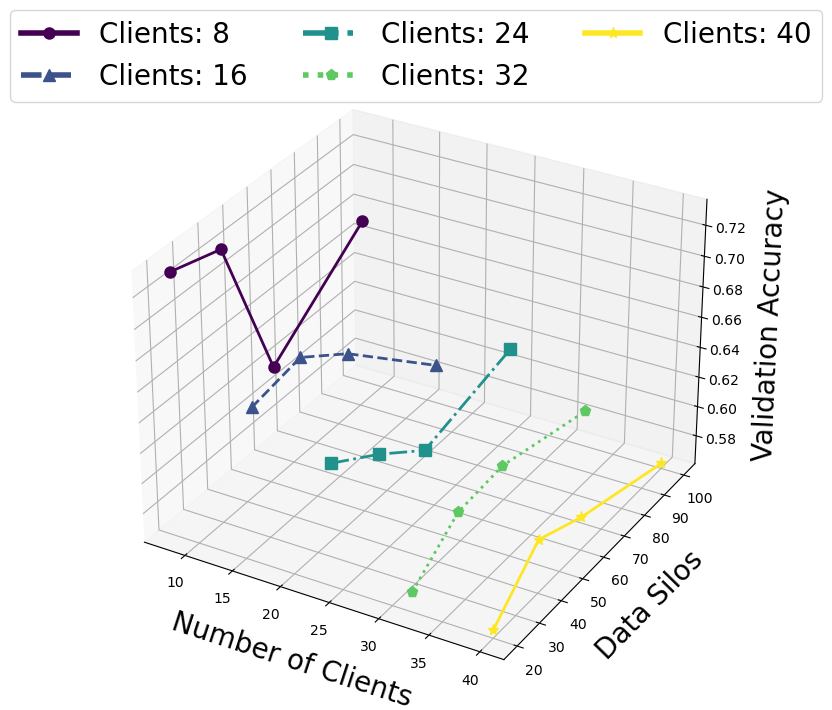

_exp_no_0_GR_50_BS_32_data_silo_40_num_user_8.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_8.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_8.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_16.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_16.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_16.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_24.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_24.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_24.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_32.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_32.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_32.0.h5
_exp_no_0_GR_50_BS_32_data_silo_40_num_user_40.0.h5
_exp_no_0_GR_50_BS_32_data_silo_20_num_user_40.0.h5
_exp_no_0_GR_50_BS_32_data_silo_60_num_user_40.0.h5


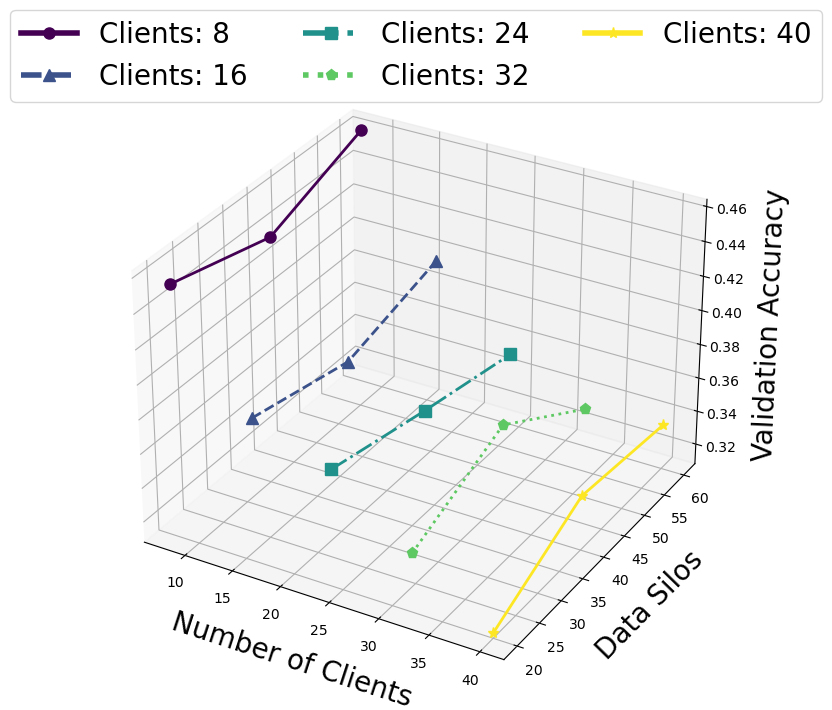

In [53]:
paths = [["/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/dynamic/8.0/h5/",
          "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/dynamic/16.0/h5/",
          "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/dynamic/24.0/h5/",
          "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/dynamic/32.0/h5/",
          "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/dynamic/40.0/h5/"],
          ["/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/dynamic/8.0/h5/",
           "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/dynamic/16.0/h5/",
           "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/dynamic/24.0/h5/",
           "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/dynamic/32.0/h5/",
           "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/dynamic/40.0/h5/"]
          ]
"""paths = [["/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/8.0/h5/",
          "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/16.0/h5/",
          "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/24.0/h5/",
          "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/32.0/h5/",
          "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/apriori/40.0/h5/"],
          ["/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/8.0/h5/",
           "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/16.0/h5/",
           "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/24.0/h5/",
           "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/32.0/h5/",
           "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/apriori/40.0/h5/"]
          ]"""
fig_path = ["/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/3/dynamic/",
            "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo/10/dynamic/"]
clients = [8, 16, 24, 32, 40]
data_silo  = [20, 40, 60, 100]

accuracy_clients_data_silo_analysis(clients, data_silo, paths, fig_path)